<table style="width:100%; border:0" cellspacing="0" cellpadding="0" border="0" align="left|left|right">
  <tr style="border:0">
  <td style="border: 0; font-size:60px" rowspan="3"><b>Universität Bielefeld</b></td>
    <td style="border: 0">CITEC / Faculty of Technology</td>
  </tr>
  <tr style="border:0">
    <td style="border: 0">Multimodal Behavior Processing Group</td>
  </tr>
</table>

## AI Fairness 360 
We will be using AI Fairness 360 for the exercises. The AI Fairness 360 Python package includes a comprehensive set of metrics for datasets and models to test for biases, explanations for these metrics, and algorithms to mitigate bias in datasets and models. 

You can look up more information about the package [here](https://aif360.mybluemix.net/)

The package can be installed using:
```[bash]
pip install 'aif360[all]'
```


## Adult dataset
This dataset is used to predict whether income exceeds $50K/yr. Contains 48842 instances, mix of continuous and discrete features.

Download the following files and place them as-is in the folder: conda-env-path\Lib\site-packages\aif360\data\raw\adult (e.g. D:\Anaconda\envs\aif360\Lib\site-packages\aif360\data\raw\adult)

1. [adult.data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)

2. [adult.test](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test)

3. [adult.names](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names)

You can find more info about the dataset here: https://archive.ics.uci.edu/ml/datasets/Adult

In [4]:
from aif360.datasets import AdultDataset 
from aif360.metrics import ClassificationMetric
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from IPython.display import Markdown, display
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.


### Load the dataset:

In [5]:
# protected features
protected = 'sex'
# privileged class 
privileged_classes = [['Male']]
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
features_to_keep=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# load the dataset 
ad = AdultDataset(protected_attribute_names=[protected],
    privileged_classes=privileged_classes, categorical_features=[],
    features_to_keep=features_to_keep)

# ad= AdultDataset()

### Info about the loaded dataset:

In [6]:
# print out some labels, names, etc.
display(Markdown("#### Dataset shape"))
print(ad.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(ad.favorable_label, ad.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(ad.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(ad.privileged_protected_attributes, ad.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(ad.feature_names)

#### Dataset shape

(48842, 6)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['sex']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['age', 'education-num', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']


In [7]:
# display the loaded datset
ad_df = ad.convert_to_dataframe()[0]
ad_df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income-per-year
0,25.0,7.0,1.0,0.0,0.0,40.0,0.0
1,38.0,9.0,1.0,0.0,0.0,50.0,0.0
2,28.0,12.0,1.0,0.0,0.0,40.0,1.0
3,44.0,10.0,1.0,7688.0,0.0,40.0,1.0
4,18.0,10.0,0.0,0.0,0.0,30.0,0.0


### Gender distribution:

Text(0.5, 1.0, 'Gender Distribution ')

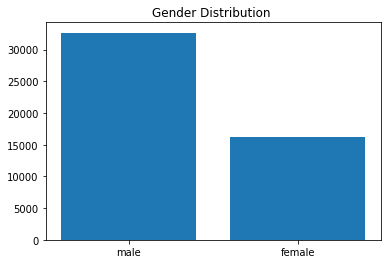

In [8]:
names = ['male', 'female']
values = [len(ad_df[ad_df['sex']==1]), len(ad_df[ad_df['sex']==0])]
plt.bar(names, values)
plt.title("Gender Distribution ") 

Text(0.5, 1.0, 'General Population vs Income')

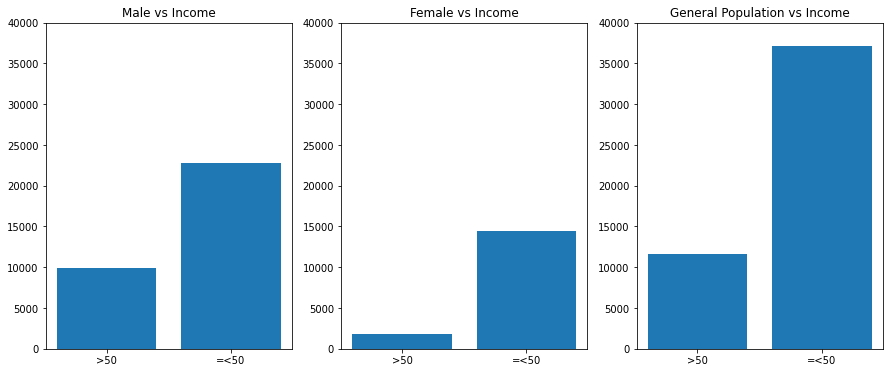

In [15]:
names = ['>50', '=<50']
count = [len(ad_df[ad_df["income-per-year"]==1]), len(ad_df[ad_df["income-per-year"]==0])]
male = ad_df[ad_df['sex']==1]
count_male = [len(male[male["income-per-year"]==1]), len(male[male["income-per-year"]==0])]
female = ad_df[ad_df['sex']==0]
count_female = [len(female[female["income-per-year"]==1]), len(female[female["income-per-year"]==0])]
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].bar(names, count_male)
ax[0].set_ylim(bottom=0, top=40000)
ax[0].set_title("Male vs Income")
ax[1].bar(names, count_female)
ax[1].set_ylim(bottom=0, top=40000)
ax[1].set_title("Female vs Income")
ax[2].bar(names, count)
ax[2].set_ylim(bottom=0, top=40000)
ax[2].set_title("General Population vs Income")

In [16]:
# split the data into train and test set 
ad_train, ad_test = ad.split([0.7], shuffle = True)

In [17]:
ad_train.convert_to_dataframe()[0]

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income-per-year
20186,56.0,4.0,1.0,0.0,2002.0,40.0,0.0
23669,59.0,10.0,0.0,0.0,0.0,35.0,0.0
34827,21.0,10.0,0.0,0.0,0.0,40.0,0.0
32067,36.0,9.0,1.0,0.0,0.0,70.0,0.0
19554,33.0,9.0,1.0,0.0,0.0,50.0,1.0
...,...,...,...,...,...,...,...
25489,22.0,9.0,1.0,0.0,0.0,40.0,0.0
42656,30.0,7.0,0.0,0.0,0.0,40.0,0.0
44546,19.0,9.0,1.0,0.0,0.0,35.0,0.0
27050,36.0,13.0,1.0,7688.0,0.0,40.0,1.0


In [18]:
def logistic_classifier( train, test, threshold=0.5):
    """
    Applies logistic regression 
    Args:
        train: Traing set
        test: Test set
        threshold: predict a favourable outcome if probabilty >= threshold
    returns:
        Dataset with predictions from the trained classifier 
    """
    
    # Placeholder for predicted datasets
    orig_train_pred = train.copy(deepcopy=True)
    orig_test_pred = test.copy(deepcopy=True)
    
    # scalling operation
    scale = StandardScaler()
    x_train = scale.fit_transform(train.features)
    y_train = train.labels.ravel()
    
    # logistic regression
    logistic = LogisticRegression()
    logistic.fit(x_train, y_train)
    
    fav_idx = np.where(logistic.classes_ == train.favorable_label)[0][0]
    y_train_pred_prob = logistic.predict_proba(x_train)[:,fav_idx]
    
    x_test = scale.fit_transform(test.features)
    y_test_pred_prob = logistic.predict_proba(x_test)[:, fav_idx]
    
    
    orig_train_pred.scores = y_train_pred_prob.reshape(-1,1)
    orig_test_pred.scores = y_test_pred_prob.reshape(-1,1)
    
    y_train_pred = np.zeros_like(orig_train_pred.labels)
    y_train_pred[y_train_pred_prob >= threshold] = orig_train_pred.favorable_label
    y_train_pred[~(y_train_pred_prob >= threshold)] = orig_train_pred.unfavorable_label
    orig_train_pred.labels = y_train_pred
    
    y_test_pred = np.zeros_like(orig_test_pred.labels)
    y_test_pred[y_test_pred_prob >= threshold] = orig_test_pred.favorable_label
    y_test_pred[~(y_test_pred_prob >= threshold)] = orig_test_pred.unfavorable_label
    orig_test_pred.labels = y_test_pred
    
    return orig_train_pred, orig_test_pred

In [19]:
# get the transformed dataset
predicted_train, predicted_test = logistic_classifier(ad_train, ad_test)

# Refresher on the various fairness metrics :

## Equalized odds

A classifier satisfies this definition if the subjects in the protected and unprotected groups have equal TPR and equal FPR.

$$P(\hat{Y} = 1 \vert A = 0 , Y = y ) = P(\hat{Y} = 1 \vert A = 1 , Y = y ) , y \in \{0,1\} $$

## Equal accuracy
 A classifier satisfies this definition if the subject in the protected and unprotected groups have equal prediction accuracy, that is, the probability of a subject from one class to be assigned to it. This is, if it satisfies the following formula
 
$$P(R=Y, A=a ) = P(R=Y, A=b )  \quad \forall  a , b \in A $$ 


## Equal opportunity
We say that a binary predictor ̂Y satisfies equal opportunity with respect to A and Y if

$$P(\hat{Y} = 1 \vert A = 0 , Y = 1 ) = P(\hat{Y} = 1 \vert A = 1 , Y = 1 )  $$


## Treatment equality
A classifier satisfies this definition if the subjects in the protected and unprotected groups have an equal ratio of FN and FP, satisfying the formula

$$\dfrac{FN_{A=a}}{FP_{A=a}} = \dfrac{FN_{A=b}}{FP_{A=b}}$$

## Demographic Parity
 A classifier satisfies this definition if the subjects in the protected and unprotected groups have equal probability of being assigned to the positive predicted class.
 
 $$P(R= + \vert A=a) = P(R= + \vert A=b) \quad \forall a, b \in A    $$
 where R is the predictions and A is the set of groups
 
 [source](https://en.wikipedia.org/wiki/Fairness_(machine_learning))
 
 Further resources:
 https://developers.google.com/machine-learning/glossary/fairness

### Calculate metrics using aif360:

In [20]:
# Class for computing metrics based on two BinaryLabelDatasets using aif360.
cm_pred_train = ClassificationMetric(ad_train, predicted_train,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)
cm_pred_test = ClassificationMetric(ad_test, predicted_test,
                             unprivileged_groups=unprivileged_groups,
                             privileged_groups=privileged_groups)

In [25]:
# method used to calculate average odds differnce
print(f"Train:",cm_pred_train.average_odds_difference(),"Test:",cm_pred_test.average_odds_difference())

Train: -0.15448118262555505 Test: -0.16902186072978914


### Task 1: Calculate  difference in Equalized odds, Equal accuracy, Equal opportunity, Treatment equality and demographic parity for the predictions.

Assume that sex is a sensitive attribute with sex=1(male) as the privileged groups  and sex=0(female) as the underprivileged  group.
To calculate the metrics you would need to first calculate the confusion matrix. 

In [468]:
def metrics(dataset_pred, dataset_true):
    
    """
    Function that takes both the predicted and ground truth dataset and calculates the different metrics 
    
    args:
    first:  Dataset with predictions
    second: Dataset with the ground truth
    
    return:
    The five metrics:Equalized odds , Equal accuracy, Treatment equality, Equal opportunity, Demographic parity
    """
    
    #####################################################
    #                   Your code                       #
    #####################################################
    
    # hint: sklearn provides a function to calculate the confusion matrix
    
    # you can convert the datset to a dataframe using the below code
    # dataset_pred = dataset_pred.convert_to_dataframe()[0]
    


### Task 2.1: Use your function( metrics )  to calculate the metrics for different threshold values. 

In [ ]:
all_thresh = np.linspace(0.01, 0.99, 25)
for threshold in all_thresh:
    
    #####################################################
    #                   Your code                       #
    #####################################################
    
    # you would need to get the predicitons for the differnt thresholds, look at dataset.scores to get the probabilty associated with the predicitons. 
    # hint: look at the function logistic_classifier to see how to use these probabilty scores to change your predictions.
    

### Task 2.2: Visualize the variations of the metrics w.r.t. the threshold. Here it would be also important to see how the overall accuracy (consider  *Balanced Accuracy* ) changes as the threshold is varied.

In [9]:
    #####################################################
    #                   Your code                       #
    #####################################################
    
    # hint: try to visualize the tradeoff between balanced accuracy and the various metrics

### Task 3: Write a short summary of what you observe from the plots.

Your findings here: *you don't need to code anything for this task, you need to document what information that you get from all your previous analysis*